<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/ARIMA/ARIMA_%5BTS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.

In [ ]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Get Data

In [ ]:
!wget nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-02-04 02:05:00--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2022-02-04 02:05:00--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-02-04 02:05:00 (25.7 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]

FINISHED --2022-02-04 02:05:00--
Total wall clock time: 0.3s
Downloaded: 1 files, 2.0K in 0s (25.7 MB/s)


**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read Data**


In [ ]:
!head airline_passengers.csv

"Month","Passengers"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136


In [ ]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
len(df), df.shape

(144, (144, 1))

**Plot Data**


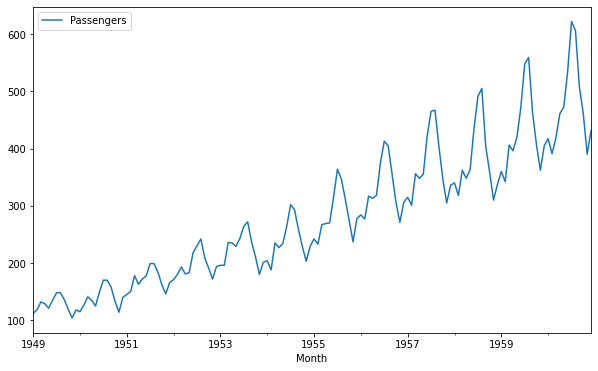

In [ ]:
df.plot(figsize=(10, 6))

**Calculate First Difference**

The diff() function calculates the difference of a DataFrame element compared with another element in the DataFrame. Periods to shift for calculating difference, accepts negative values. Take difference over rows (0) or columns (1)

In [ ]:
df['lstdiff'] = df['Passengers'].diff() #first difference
df.head()

,Passengers,lstdiff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


When viewed from the result is, the result of column 2 minus column 1, then the result of column 3 minus column 2

**Plot Result**

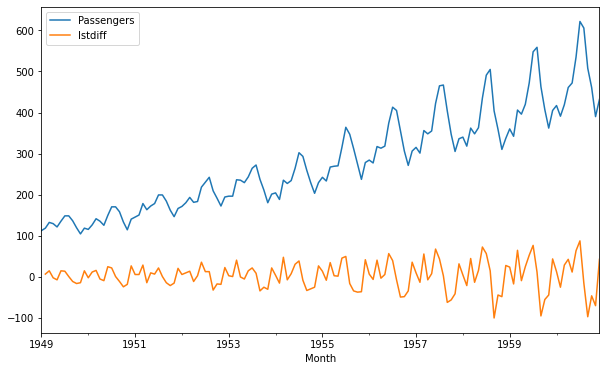

In [ ]:
df.plot(figsize=(10, 6))

**Compute Log for Column Passengers**


In [ ]:
#compute the log of column passengers
df['LogPassengers'] = np.log(df['Passengers'])
df.head()

,Passengers,lstdiff,LogPassengers
Month,,,
1949-01-01,112,NaN,4.718499
1949-02-01,118,6.0,4.770685
1949-03-01,132,14.0,4.882802
1949-04-01,129,-3.0,4.859812
1949-05-01,121,-8.0,4.795791


**Plot for Log Passengers**


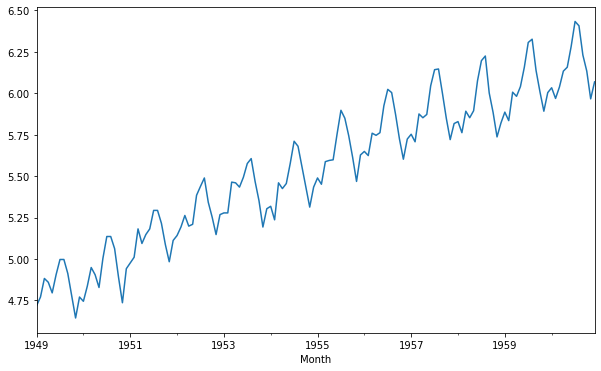

In [ ]:
df['LogPassengers'].plot(figsize=(10, 6))

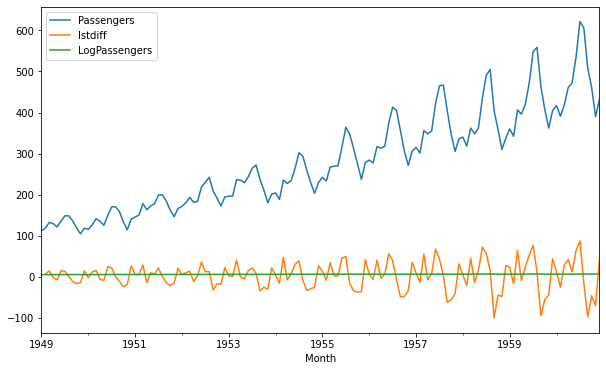

In [ ]:
df.plot(figsize=(10, 6))

**Import Library for ARIMA class**


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df.index.freq = 'MS'

# we're going to set the frequency of our data from index to months

We're also going to split our data into train and test using the last 12 months of our data set, as the test set.


In [ ]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

Next step is to create a trainer and test reacts in order to index our data frame either in the train or test.
Recall that this is necessary for when we want to store our predictions in the data frame

In [ ]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

We're going to test in airline model.
This is a model in which the current value in the Time series depends linearly on just the previous value, as you recall.

This is equivalent to a ARIMA one zero zero.

In [ ]:
arima = ARIMA(train['Passengers'], order=(1, 0, 0))

In [ ]:
arima_result = arima.fit()

In [ ]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1]
)

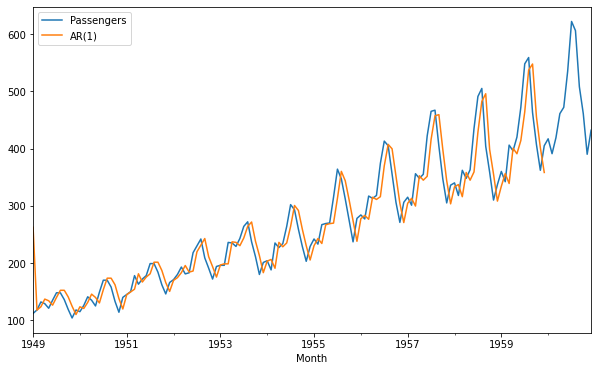

In [ ]:
df[['Passengers', 'AR(1)']].plot(figsize=(10, 6))

So as you can see, we get this kind of delayed behavior, which should remind you of what happened with `Holts Winters`, as you recall, this is how `Holt Winters` also behaved when the model was specified.

In these cases, it seems like the best your model can do is to just copy the previous value or close to it.

In [ ]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

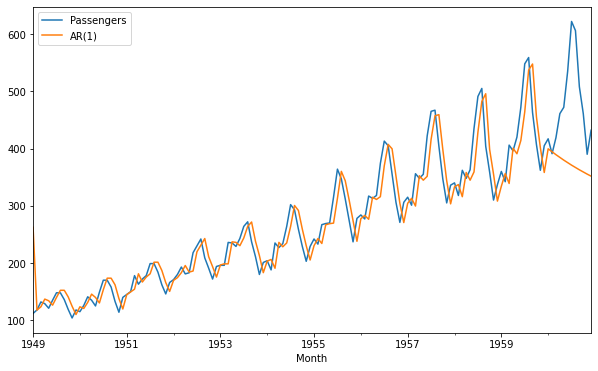

In [ ]:
df[['Passengers', 'AR(1)']].plot(figsize=(10, 6))

As you can see, this model is not very good, in fact, it doesn't even capture the fact that the data is trending upwards.

Instead, the forecast is going in completely the wrong direction.

So even a naive forecast would be better than this.


In [ ]:
# Explore prediction result further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

Next step is to learn how to obtain our confidence intervals in order to do this, we'll call the `function` and `confidence interval`.

In [ ]:
# Confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338255,499.534230
1960-05-01,253.432283,506.121348
1960-06-01,239.373402,511.217438
1960-07-01,226.768867,515.201639
1960-08-01,215.354569,518.324977
1960-09-01,204.941149,520.764225
1960-10-01,195.386336,522.649550


We're going to write a function that will plot the fitted values of an ARIMA model along with the forecast and confidence intervals.

This will be helpful for the rest of this script so that we don't have to keep writing this code over and over again.

So this function, it takes in one argument, which is ARIMA result object inside the function.

Next, we will call the plot function again, this time passing in the test index along with the forecast values.

We'll give this the label forecast next.

In order to plot the confidence balance, we'll use the function at fill between the arguments to this will be the test index.

Once again, the lower and upper values, the color red and alpha equals zero point three to set the  transparency.

Lastly, we call a legend so that the legend will show up in our plot


In [ ]:
# define function to get result for ARIMA MODELS
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(10, 6))

  # We call applied function passing in the passenger's 
  # column of the data frame. This will plot the true data.
  ax.plot(df['Passengers'], label='data')

  # plot the curve fitted on train set
  # Next, we're going to obtain the train predictions by calling a result that fitted values. 
  # Then we will plot the train predictions by calling the plot function again
  # passing in the train index along  with the train predictions we just obtained. 
  train_pred = result.fittedvalues
  # We'll make this plot green and we'll give it the label fitted.
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  # We need to call the method in order to get a data frame containing the confidence intervals.
  conf_int = prediction_result.conf_int()
  # The next step is to assign these confidence interval columns to variables called lower and upper.
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  # The next step is to grab our forecast to obtain the actual predicted values.
  # Again, this uses the attribute predicted mean.
  forecast = prediction_result.predicted_mean
  # Next, we will plot the forecast to start, we need to call result dot get forecast for Ntest steps. 
  # This gives us backup prediction results objects from there.
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

We're going to test the function we just created passing in the 
Arima result objects we got back earlier.

OK, so this is our ARIMA forecast again, not very good, but we have many options to try next.

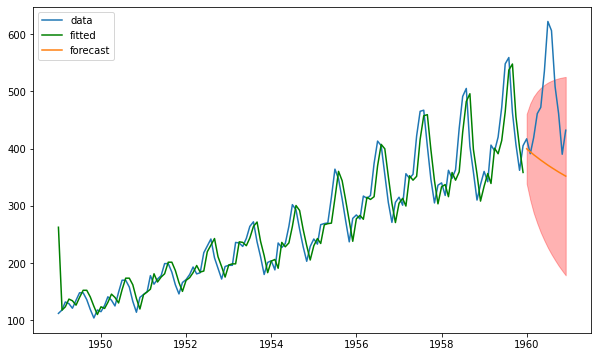

In [ ]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


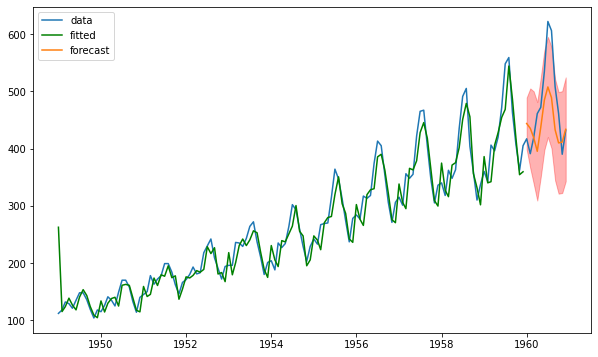

In [ ]:
arima = ARIMA(train['Passengers'], order=(10,0,0)) #AR=10
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

we see that this does, in fact, do a much better job.

The first thing we notice is that it does not have the *Lagging* characteristic that the previous *AR(1)* model had.

This suggests that the model is actually learning to anticipate the pattern rather than just copying the last value.

If we look at the forecast, we see that the model really does learn that the signal is periodic.

Unfortunately, it seems to underestimate the true value significantly.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


'\nThe result pretty bad. MA=1 doesnt work better than AR=10\n'

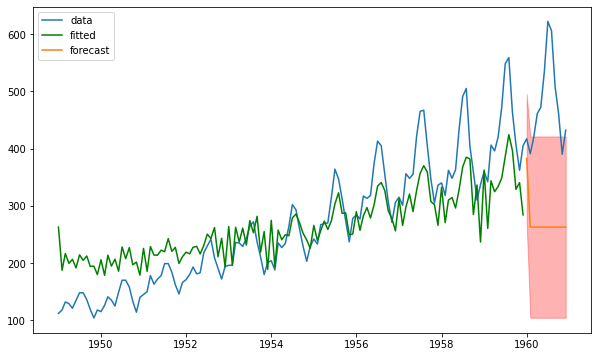

In [ ]:
arima = ARIMA(train['Passengers'], order=(0, 0, 1)) #MA=1
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

"""
The result pretty bad. MA=1 doesnt work better than AR=10
"""

We're going to investigate using the log passengers.

Let's begin by taking the first difference of the log passengers using `diff()` function.

In [ ]:
df['Loglstdiff'] = df['LogPassengers'].diff()
df.head()

,Passengers,lstdiff,LogPassengers,AR(1),Loglstdiff
Month,,,,,
1949-01-01,112,NaN,4.718499,262.490027,NaN
1949-02-01,118,6.0,4.770685,117.750054,0.052186
1949-03-01,132,14.0,4.882802,123.520801,0.112117
1949-04-01,129,-3.0,4.859812,136.985877,-0.022990
1949-05-01,121,-8.0,4.795791,134.100503,-0.064022


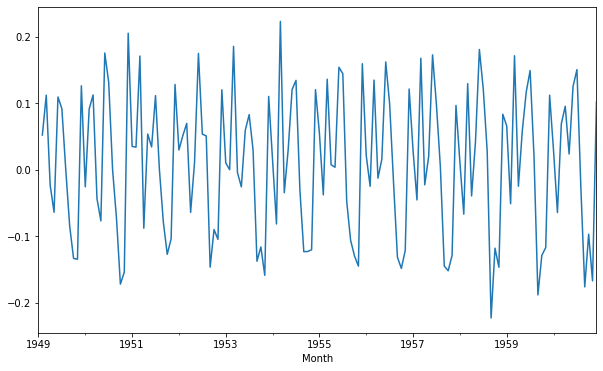

In [ ]:
df['Loglstdiff'].plot(figsize=(10, 6))

As you can see, the behavior is indeed what we expected.
Unlike the first difference of the non logged passengers, these values do not seem to grow that much over time.

In [ ]:
arima = ARIMA(train['Passengers'], order=(8, 1, 1))
arima_result_811 = arima.fit()
# plot_fit_and_forecast(arima_result)

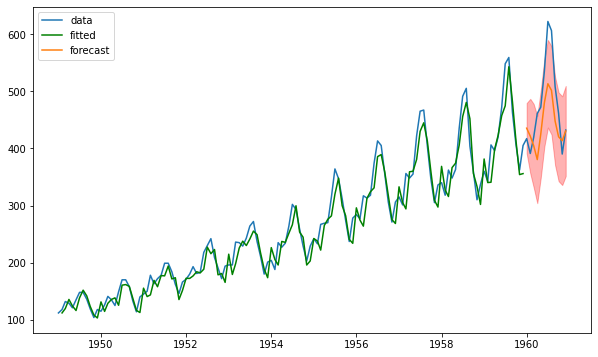

In [ ]:
def plot_fit_and_forecast_int(result, d, col='Passengers'):
  """
  It now takes in a three arguments instead of just one.
  First, it takes in the Arima results object, same as before.
  Second, it takes in a value for d for represent the first row in the Difference Time series that actually exists.
  Third, we have an argument called Call, which will tell us which column of the data frame we fit,
  the model line that will either be passengers or log passengers.
  Of course, we have to choose the appropriate one in order to plot the correct data.
  """
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

As you can see, this does pretty well better than a purely auto regressive model, the train fit is pretty good and the forecast captures the seasonality, although it still seems to underestimate the peak.


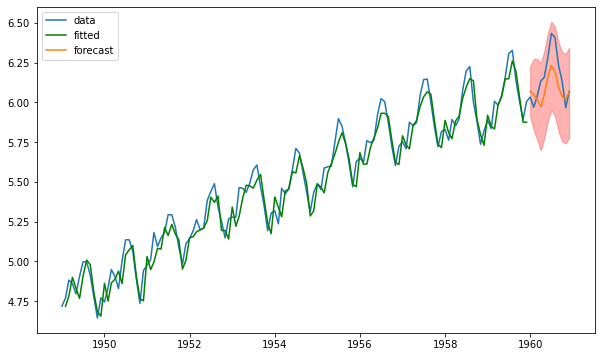

In [ ]:
arima = ARIMA(train['LogPassengers'], order=(8, 1, 1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


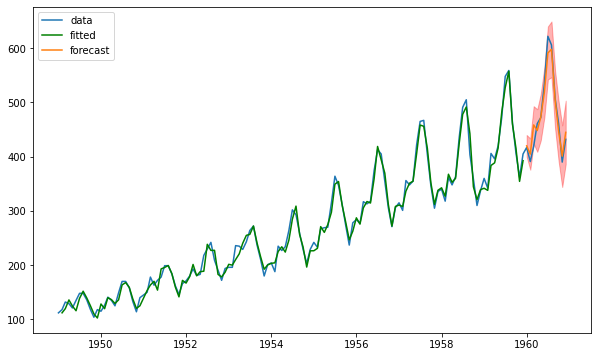

In [ ]:
arima = ARIMA(train['Passengers'], order=(12, 1, 0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

It seems like this is our best model so far

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


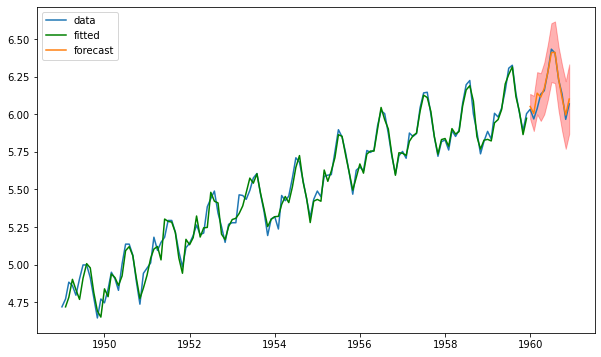

In [ ]:
arima = ARIMA(train['LogPassengers'], order=(12, 1, 0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

Just out of curiosity, I wanted to fit another model on the log passenger's data set with the same Arima parameters.

OK, so, again, it looks pretty good, but it's hard to tell which one is better.


In [ ]:
def rmse(result, is_loggged):
  forecast = result.forecast(Ntest)
  if is_loggged:
    forecast = np.exp(forecast)

    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t - y)**2))

In [ ]:
print('ARIMA Order(8,1,1):', rmse(arima_result_811, False))
print('ARIMA Order(8,1,1) logged:', rmse(arima_result_log811, True))
print('ARIMA Order(12,1,0):', rmse(arima_result_1210, False))
print('ARIMA Order(12,1,0) logged:', rmse(arima_result_log1210, True))

ARIMA Order(8,1,1): None
ARIMA Order(8,1,1) logged: 61.6060499311999
ARIMA Order(12,1,0): None
ARIMA Order(12,1,0) logged: 16.173491680975104
